<a href="https://colab.research.google.com/github/sudeepmenon17/PytorchforNN/blob/main/AirfoilS809_SAmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [424]:
!pip install google-auth

In [425]:
from google.colab import auth
from google.colab import drive

In [426]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [427]:
# !ls /content/drive/MyDrive/


In [428]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [429]:
# Create a Model class
class Model(nn.Module):
  def __init__(self,in_features=6, h1 = 61, h2 = 60, out_features=1):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    # self.fc3 = nn.Linear(h2,h3)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.sigmoid(self.fc1(x))
    x = F.sigmoid(self.fc2(x))
    # x = F.leaky_relu(self.fc3(x))
    x = self.out(x)

    return x

In [430]:
# torch.manual_seed(42)

model = Model()

In [431]:
# Read the data set -  Airfoil S809
df1 = pd.read_csv("/content/drive/MyDrive/data_set1.csv")
df2 = pd.read_csv("/content/drive/MyDrive/data_set2.csv")
df3 = pd.read_csv("/content/drive/MyDrive/data_set3.csv")
df4 = pd.read_csv("/content/drive/MyDrive/data_set4.csv")


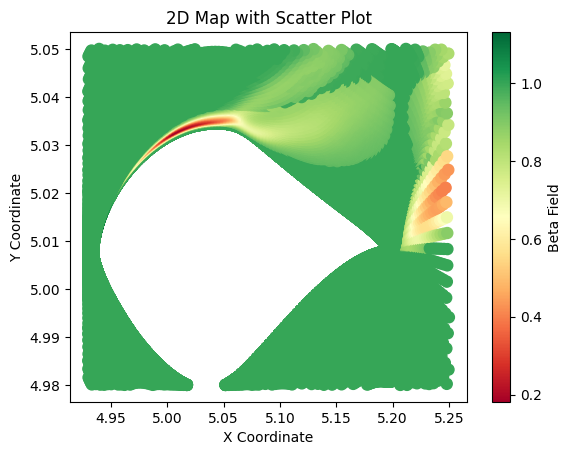

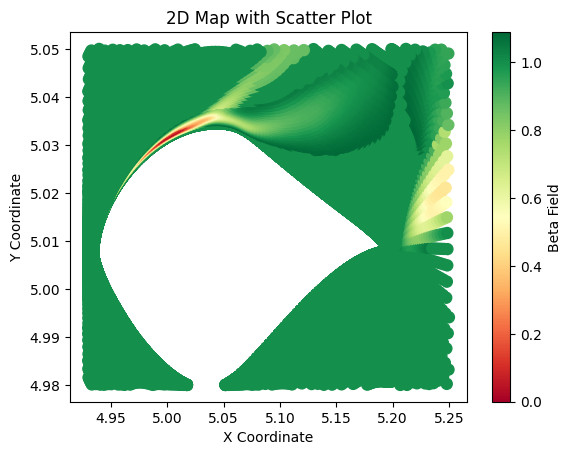

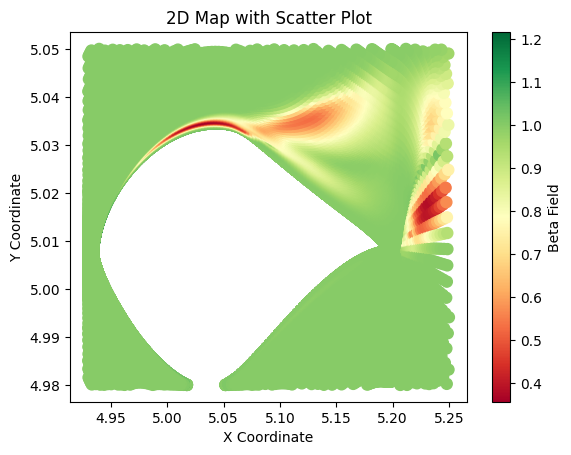

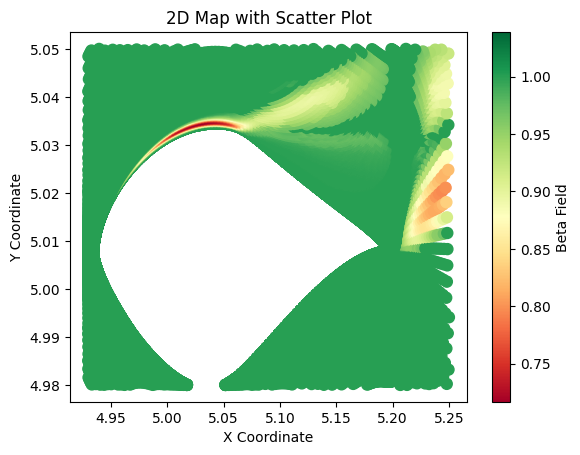

In [432]:
# Combine data
frames = [df1, df2, df3, df4]
ff = []

for item in frames:
  xc = np.array(item['x'])
  yc = np.array(item['y'])
  b = np.array(item['beta'])
  ff1 = np.array(item['feature1'])
  ff2 = np.array(item['feature2'])
  ff3 = np.array(item['feature3'])
  ff4 = np.array(item['feature4'])
  ff5 = np.array(item['feature5'])
  ff6 = np.array(item['feature6'])

  b2 = []


  # Normalize x and y coordinates
  min_range = -5.0
  max_range = 5.0
  xc = (xc - np.min(xc)) * (max_range - min_range) / (np.max(xc) - np.min(xc))
  yc = (yc - np.min(yc)) * (max_range - min_range) / (np.max(yc) - np.min(yc))


  # #####################################################################
  # # Cleaning the beta field in the wake region
  # for k in range(len(xc)):
  #   if xc[k] >= 5.2 and xc[k] <= 5.3:
  #     if yc[k] >= 5.00 and yc[k] <= 4.96:
  #       b2.append(b[k])

  # for j in range(len(xc)):
  #   if xc[j] > 5.15 or yc[j]>5.04:
  #     b[j] = np.mean(b2)

  x1,y1,b1,f1,f2,f3,f4,f5,f6 = [[] for i in range(9)]
  # Filter data for the specified range of coordinates
  for i in range(len(xc)):
    if xc[i]>=4.93 and xc[i]<=5.25:
      if yc[i]>=4.98 and yc[i]<=5.05:
        x1.append(xc[i])
        y1.append(yc[i])
        b1.append(b[i])
        f1.append(ff1[i])
        f2.append(ff2[i])
        f3.append(ff3[i])
        f4.append(ff4[i])
        f5.append(ff5[i])
        f6.append(ff6[i])

  modified_data = {
  'x': np.array(x1),
  'y': np.array(y1),
  'beta': np.array(b1),
  'feature1': np.array(f1),
  'feature2': np.array(f2),
  'feature3': np.array(f3),
  'feature4': np.array(f4),
  'feature5': np.array(f5),
  'feature6': np.array(f6)
  }

  # modified_data = {
  #   'x': np.array(xc),
  #   'y': np.array(yc),
  #   'beta': np.array(b),
  #   'feature1': np.array(item['feature1']),
  #   'feature2': np.array(item['feature2']),
  #   'feature3': np.array(item['feature3']),
  #   'feature4': np.array(item['feature4']),
  #   'feature5': np.array(item['feature5']),
  #   'feature6': np.array(item['feature6'])
  # }


  ff.append(pd.DataFrame(modified_data))

  # # #####################################################################
  # # Plotting cleaned data
  # ################################
  # nx = []
  # ny = []
  # nb = []


  # # Filter data for the specified range of coordinates
  # for i in range(len(xc)):
  #   if xc[i]>=4.9 and xc[i]<=5.3:
  #     if yc[i]>=4.925 and yc[i]<=5.075:
  #       nx.append(xc[i])
  #       ny.append(yc[i])
  #       nb.append(b[i])

  # Create a scatter plot
  plt.scatter(x1, y1, c=b1,  cmap= 'RdYlGn',alpha=1, marker='.',s=250)
  plt.colorbar(label='Beta Field')
  plt.xlabel('X Coordinate')
  plt.ylabel('Y Coordinate')
  plt.title('2D Map with Scatter Plot')
  plt.show()
###############################################################################

df = pd.concat(ff)


# Data for beta>1.02 or beta<0.98
df_filtered = df[(df['beta'] < 0.998) | (df['beta'] > 1.002)]

# df_filtered = df[((df['x'] >=4.95) & (df['x'] <= 5.20) & (df['y'] >= 5.01) & (df['y'] <=5.03)) | df['beta'] <=0.5]



In [433]:
# frames = [df3]
# ff = []
# for item in frames:
#   xc = np.array(item['x'])
#   yc = np.array(item['y'])
#   b = np.array(item['beta'])
#   b1 = []


#   # Normalize x and y coordinates
#   min_range = -5.0
#   max_range = 5.0
#   xc = (xc - np.min(xc)) * (max_range - min_range) / (np.max(xc) - np.min(xc))
#   yc = (yc - np.min(yc)) * (max_range - min_range) / (np.max(yc) - np.min(yc))


#   # #####################################################################
#   # # Cleaning the beta field in the wake region
#   # for k in range(len(xc)):
#   #   if xc[k] >= 5.2 and xc[k] <= 5.3:
#   #     if yc[k] >= 4.94 and yc[k] <= 4.96:
#   #       b1.append(b[k])

#   # for j in range(len(xc)):
#   #   if xc[j] > 5.15 or yc[j]>5.04:
#   #     b[j] = np.mean(b1)

#   modified_data = {
#     'x': np.array(xc),
#     'y': np.array(yc),
#     'beta': np.array(b),
#     'feature1': np.array(item['feature1']),
#     'feature2': np.array(item['feature2']),
#     'feature3': np.array(item['feature3']),
#     'feature4': np.array(item['feature4']),
#     'feature5': np.array(item['feature5']),
#     'feature6': np.array(item['feature6'])
#   }

#   item = pd.DataFrame(modified_data)

#   ff.append(item)
# df = pd.concat(ff)

# x1 = np.array(df['x'])
# y1 = np.array(df['y'])
# b1 = np.array(df['beta'])
# f1 = np.array(df['feature1'])
# f2 = np.array(df['feature2'])
# f3 = np.array(df['feature3'])
# f4 = np.array(df['feature4'])
# f5 = np.array(df['feature5'])
# f6 = np.array(df['feature6'])


# nx = []
# ny = []
# nb = []


# # Filter data for the specified range of coordinates
# for i in range(len(xc)):
#   if x1[i]>=4.9 and x1[i]<=5.3:
#     if y1[i]>=4.925 and y1[i]<=5.075:
#       nx.append(x1[i])
#       ny.append(y1[i])
#       nb.append(f6[i])

# # Create a scatter plot
# plt.scatter(nx,ny, c=nb,  cmap= 'RdYlGn',alpha=1, marker='.',s=250)
# plt.colorbar(label='feature6')
# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.title('feature6(Re = 2e6, alpha = 14.2)')
# plt.show()

In [434]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler


# Preprocess Features
df1 = df_filtered.drop(['x','y','beta'],axis=1)
df2 = df_filtered.drop(['x','y','feature1','feature2','feature3','feature4','feature5','feature6'],axis=1)


# Fill missing values with the mean
# df1 = df1.fillna(df1.mean())


# Standardization
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler(feature_range=(-4, 2))
transformer = Normalizer()
scaler = RobustScaler(with_centering=False)

# Features
X = scaler.fit_transform(df1)

# Target
# y = df_filtered['beta'].values
# y = standard_scaler.fit_transform(df2)
# y = min_max_scaler.fit_transform(df2)
# y = scaler.fit_transform(df2)
y = df2.values

In [435]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001,weight_decay=0.03)
# optimizer = torch.optim.SGD(model.parameters(),lr = 0.001,weight_decay=0.01)

In [436]:
#5-Fold Cross Validation
from sklearn import metrics

from sklearn.model_selection import KFold
kFold=KFold(n_splits=5,shuffle=True, random_state=100)

# Initialize a list to store the evaluation scores
scores = []
training_cost = []
testing_cost =[]
iterations = 100
train_fold = [[] for i in range(5)]
test_fold = [[] for i in range(5)]
c = 0
for train_index,test_index in kFold.split(X):
  print("Train Index: ", train_index, "\n")
  print("Test Index: ", test_index)
  print("Size of training data:", len(train_index),"\n")
  print("Size of testing data:", len(test_index),"\n")

  X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]


  X_train = torch.FloatTensor(X_train)
  X_test = torch.FloatTensor(X_test)

  y_train = torch.FloatTensor(y_train)
  y_test = torch.FloatTensor(y_test)


  losses = []
  for i in range(iterations):
    # go forward and predict
    y_pred = model.forward(X_train)

    # Measure the loss
    loss = criterion(y_pred,y_train)

    # Keep track of the losses
    losses.append(loss.detach().numpy())

    # print every 10 epoch
    if i % 10 == 0:
      print(f'iter: {i} and loss: {loss}')

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_fold[c].append(y_pred.detach().numpy())
  train_fold[c].append(y_train.detach().numpy())
  training_cost.append(losses)

  # Evaluate Model
  with torch.no_grad():
    y_eval = model.forward(X_test)
    test_loss = criterion(y_eval,y_test)
  test_fold[c].append(y_eval.detach().numpy())
  test_fold[c].append(y_test.detach().numpy())

  testing_cost.append(test_loss)
  scores.append(metrics.mean_squared_error(y_eval,y_test))
  print('MSEloss: {}'.format(testing_cost))
  print('MSE error: {}'.format(scores))

  c = c+1

Train Index:  [    0     1     2 ... 22422 22423 22424] 

Test Index:  [    7     8    11 ... 22404 22408 22410]
Size of training data: 17940 

Size of testing data: 4485 

iter: 0 and loss: 1.3328238725662231
iter: 10 and loss: 0.34018784761428833
iter: 20 and loss: 0.03489026054739952
iter: 30 and loss: 0.04176776111125946
iter: 40 and loss: 0.036685217171907425
iter: 50 and loss: 0.026088643819093704
iter: 60 and loss: 0.02829471044242382
iter: 70 and loss: 0.027092628180980682
iter: 80 and loss: 0.026007086038589478
iter: 90 and loss: 0.025916164740920067
MSEloss: [tensor(0.0266)]
MSE error: [0.026645182]
Train Index:  [    0     4     5 ... 22422 22423 22424] 

Test Index:  [    1     2     3 ... 22411 22415 22420]
Size of training data: 17940 

Size of testing data: 4485 

iter: 0 and loss: 0.02613319642841816
iter: 10 and loss: 0.026144573464989662
iter: 20 and loss: 0.026010489091277122
iter: 30 and loss: 0.025877920910716057
iter: 40 and loss: 0.025775212794542313
iter: 50 and

Text(0.5, 0, 'Epoch')

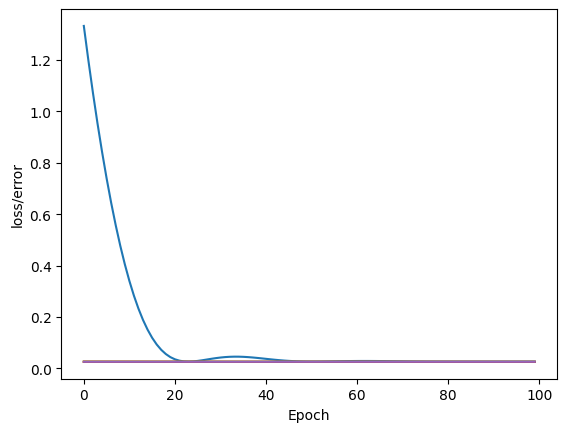

In [437]:
plt.plot(range(iterations), training_cost[0])
plt.plot(range(iterations), training_cost[1])
plt.plot(range(iterations), training_cost[2])
plt.plot(range(iterations), training_cost[3])
plt.plot(range(iterations), training_cost[4])
plt.ylabel("loss/error")
plt.xlabel('Epoch')

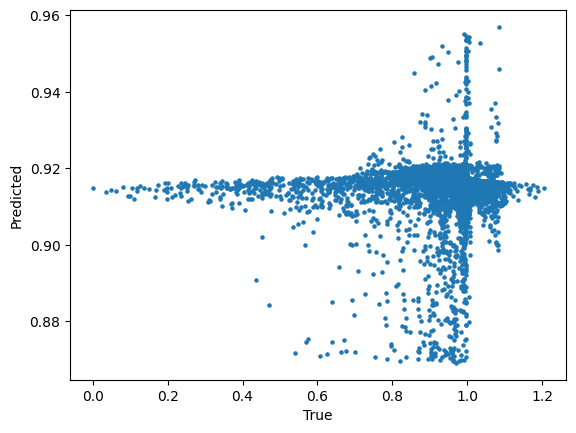

In [438]:
x =test_fold[2][1]
y = test_fold[2][0]
x1 = []
y1 = []
# for i in range(len(x)):
#   # if y[i] < 0.9:
#   #   x1.append(x[i])
#   #   y1.append(y[i])
# min_range = 0
# max_range = 1
# x = (x - np.min(x)) * (max_range - min_range) / (np.max(x) - np.min(x))
# y = (y - np.min(y)) * (max_range - min_range) / (np.max(y) - np.min(y))

plt.scatter(x,y,s =5 )
# plt.scatter(train_fold[1][0],train_fold[1][1], s=5)
plt.xlabel('True')
plt.ylabel('Predicted')
# plt.ylim(-4,2)

plt.show()
